# YOLOv8 Image Classification

## Environment

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/YOLOv8/0_image_classification

/content/drive/MyDrive/YOLOv8/0_image_classification


In [ ]:
# Install Ultralytics
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## Classification / Prediction

In [ ]:
# Image Classification / Test / ImageNet
!yolo classify predict model=yolov8l-cls.pt source="https://www.southernliving.com/thmb/Rz-dYEhwq_82C5_Y9GLH2ZlEoYw=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg" save=True

100% 71.7M/71.7M [00:00<00:00, 112MB/s]
Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 37465576 parameters, 0 gradients

100% 123k/123k [00:00<00:00, 4.66MB/s]
100% 755k/755k [00:00<00:00, 14.5MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/0_image_classification/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg: 224x224 golden_retriever 0.98, Labrador_retriever 0.00, Tibetan_mastiff 0.00, Norfolk_terrier 0.00, Newfoundland 0.00, 618.5ms
Speed: 24.6ms preprocess, 618.5ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


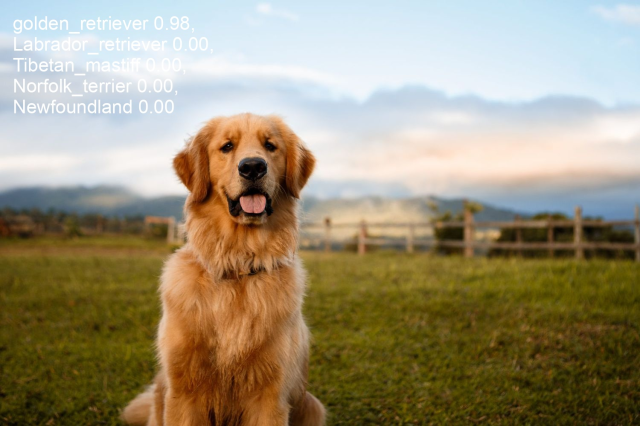

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOv8/0_image_classification/runs/classify/predict/prediction_1.jpg"

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)
cv2_imshow(img)

In [ ]:
import numpy as np
from ultralytics import YOLO

img_path = "runs/classify/predict/prediction_1.jpg"
model_path = "yolov8l-cls.pt"

model = YOLO(model_path) # load model
results = model(img_path) # load image and classify

class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Class: ", class_dict)
print("Probabilities: ", probs)

print("Result:  ", class_dict[np.argmax(probs)])

## Training

In [ ]:
# Unzip file
!unzip data/covid_classification.zip -d ./data

In [ ]:
# Train
!yolo classify train model=yolov8l-cls.pt data=data/covid_classification imgsz=224 workers=8 batch=16 device=0 epochs=25 name="yolov8_classification"

In [ ]:
# Continue unfinished Training
!yolo classify train model=runs/classify/yolov8_classification2/weights/last.pt resume=True

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=runs/classify/yolov8_classification2/weights/last.pt, data=data/covid_classification, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

## COVID Classification / Prediction

In [ ]:
# Image Classification
!yolo classify predict model=runs/classify/yolov8_classification2/weights/best.pt source=inference save=True

Ultralytics YOLOv8.0.182 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients

image 1/12 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/COVID-315.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.9ms
image 2/12 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/COVID-320.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.9ms
image 3/12 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/COVID-330.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.9ms
image 4/12 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/COVID-336.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 11.0ms
image 5/12 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/Normal-551.png: 224x224 normal 0.93, viral_pneumonia 0.07, covid 0.00, 11.0ms
image 6/12 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/Normal-


image 1/1 /content/drive/MyDrive/YOLOv8/0_image_classification/inference/Viral Pneumonia-775.png: 224x224 viral_pneumonia 1.00, normal 0.00, covid 0.00, 11.3ms
Speed: 1.3ms preprocess, 11.3ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 224)


Sınıflar {0: 'covid', 1: 'normal', 2: 'viral_pneumonia'}
Olasılıklar [4.2801644895007485e-07, 3.175105302943848e-05, 0.9999678134918213]
Sonuç:  viral_pneumonia


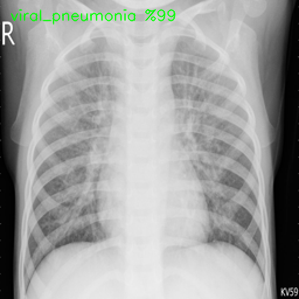

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


img_path = "inference/Viral Pneumonia-775.png"
model_path = "runs/classify/yolov8_classification2/weights/best.pt"

model = YOLO(model_path) # load model
results = model(img_path) # load image and classify

class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Class: ", class_dict)
print("Probabilities: ", probs)

print("Result:  ", class_dict[np.argmax(probs)])

name = class_dict[np.argmax(probs)]
max_prob = int(np.max(probs) * 100)

# print(name + " " + "%" + str(max_prob))

text = name + " " + "%" + str(max_prob)


img = cv2.imread(img_path)
cv2.putText(img, text, (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

cv2_imshow(img)